(Written by Amir Akhavan)

In [207]:
import requests
import pandas as pd
import json
from pathlib import Path
from itertools import cycle
from time import sleep
from random import random

In [162]:
from bs4 import BeautifulSoup
from tqdm import tqdm

In [2]:
PREPROCESSED_DATA_PATH = Path('../.../data/preprocessed/property_assessor')

In [3]:
county_fips_code = '45039'

In [4]:
initial  = "https://beacon.schneidercorp.com/Application.aspx?AppID=796&LayerID=16296"
x_initial = requests.get(initial)
x_initial = x_initial.content.decode("utf-8")

In [5]:
qps_location = x_initial.find('QPS')
qps_closing_str = x_initial[qps_location+6:]
end = qps_closing_str.find('"')
QPS = qps_closing_str[:end]

In [13]:
QPS

'F9tZvOIY_XZOdUskmaGw54VoDEVPL0bY8E9muKXf1q0Y3RtiKO-fXkr2WvfxscDkbVAKnYudfhVepVVn-oXYgP-dqgsX8get-bxXhSkh4h4NzFwuFmgkFApZxPKkUjTUOnZS8m05u_47GWkMiLArf-BELR2u4O_IsifbxqlkvNtpyWSI9NEdFPBGUG59ko3ZnbGXYYaGVTaUEWlA9LDwawoz8bXObWcDd2mFX2k6SDnSaEkr5mgwe-AqziPV5IUfvXBMc1qOAcgs1In8v_8iYw2'

In [137]:
url = f'https://qpublic.schneidercorp.com/api/beaconCore/BufferAndExport?QPS={QPS}'
myobj = {
    'layerId': '11834', # '16297', #  original: "11834",
    'keys': ["001-00-00-003-000", "150-00-00-004-000"],
    'distance': 10000000,
    'exportType': "xlsx",
    # 'keys': ["001-00-00-003-000", "028-00-00-004-000"],
    'showParcelId': 'true',
    'skipLabelCount': "0",
    'usePropertyAddress': 'true',
    # my additions:
    #'Visible': 'true',
    #'LayerName': 'Parcels',
    #'Query': 'true',
    #"HasMap":'true',
}
x = requests.post(url, data = myobj)
url_of_csv="https://beacon.schneidercorp.com/"

In [138]:
# x.content

In [139]:
str_vals = json.loads(x.content)
download_url = url_of_csv+str_vals['d']['DownloadUrl']
df = pd.read_excel(download_url)
df = df.drop_duplicates()

In [140]:
# str_vals['d']

In [141]:
geometry = str_vals['d']['BufferGeometry'].split('MULTIPOLYGON')[1].replace('(', '[').replace(')', ']')

In [142]:
df

,ParcelId,OwnerName,Address,City,State,Zip
0,216-00-00-005-000,CURRENT RESIDENT,2100FT W OF INT S-20-323 & S-20-324,Fairfield,SC,NaN
1,215-00-00-074-000,CURRENT RESIDENT,293 EMERALD DR TRACT,Fairfield,SC,NaN
2,215-00-00-102-000,CURRENT RESIDENT,285 EMERALD DR,Fairfield,SC,NaN
3,026-04-02-005-000,CURRENT RESIDENT,SW OF GIBSON END RD RD,Fairfield,SC,NaN
4,026-04-02-007-000,CURRENT RESIDENT,557 GIBSON END ROAD,Fairfield,SC,NaN
...,...,...,...,...,...,...
17480,141-00-00-031-000,CURRENT RESIDENT,S 2000FT INT S-20-115 & HWY 34 E H,Fairfield,SC,NaN
17481,077-01-00-002-000,CURRENT RESIDENT,1704 GREAT NORTH RD RD,Fairfield,SC,NaN
17482,048-00-00-002-000,CURRENT RESIDENT,"HWY 215 N, CLOWNEY & JOHN BRICE RDS",Fairfield,SC,NaN
17483,047-00-00-047-000,CURRENT RESIDENT,JOHN BRICE RD,Fairfield,SC,NaN


In [143]:
#df = df.set_index('ParcelId')
#df

In [144]:
parcel_ids = df['ParcelId']
parcel_ids

0        216-00-00-005-000
1        215-00-00-074-000
2        215-00-00-102-000
3        026-04-02-005-000
4        026-04-02-007-000
               ...        
17480    141-00-00-031-000
17481    077-01-00-002-000
17482    048-00-00-002-000
17483    047-00-00-047-000
17490    114-01-01-021-000
Name: ParcelId, Length: 17244, dtype: object

In [193]:
proxies = '''41.169.151.90	46799	ZA	elite proxy	no
103.217.173.210	53905	ID	elite proxy	no
54.180.116.100	80	KR	elite proxy	no
134.209.23.176	80	GB	elite proxy	no
13.232.204.214	80	IN	elite proxy	no
169.57.1.84	8123	MX	elite proxy	no
200.35.49.89	43006	CO	elite proxy	no
175.212.226.57	80	KR	elite proxy	no
159.224.182.206	51578	UA	elite proxy	no
103.235.199.46	31611	NP	elite proxy	no
139.194.11.216	8080	ID	elite proxy	no
103.103.212.25	53281	IN	elite proxy	no
165.16.118.206	8080	LY	elite proxy	no
37.220.195.14	53281	HU	elite proxy	no
177.93.97.77	37113	BR	elite proxy	no
103.225.206.22	31777	IN	elite proxy	no
89.34.208.223	50478	RO	elite proxy	no
210.56.245.101	8080	AU	elite proxy	no
5.133.8.209	5836	PL	elite proxy	no
195.230.115.115	8080	UA	elite proxy	no'''
proxies = [':'.join(proxy.split('\t')[:2]) for proxy in proxies.split('\n')]
proxies

['41.169.151.90:46799',
 '103.217.173.210:53905',
 '54.180.116.100:80',
 '134.209.23.176:80',
 '13.232.204.214:80',
 '169.57.1.84:8123',
 '200.35.49.89:43006',
 '175.212.226.57:80',
 '159.224.182.206:51578',
 '103.235.199.46:31611',
 '139.194.11.216:8080',
 '103.103.212.25:53281',
 '165.16.118.206:8080',
 '37.220.195.14:53281',
 '177.93.97.77:37113',
 '103.225.206.22:31777',
 '89.34.208.223:50478',
 '210.56.245.101:8080',
 '5.133.8.209:5836',
 '195.230.115.115:8080']

In [203]:
def lookup_parcel_id(parcel_id, proxy):
    proxies = {
        #'http': 'http://85.10.219.97:1080',
        #'https': 'http://85.10.219.97:1080',
        #'http': 'http://41.169.151.90:46799'
        #'http': 'http://54.180.116.100:80'
        'http': 'http://' + proxy
    }
    
    property_lookup_url = 'https://beacon.schneidercorp.com/Application.aspx?AppID=796&LayerID=11834&PageTypeID=4&PageID=5738&Q=1649139588&KeyValue='
    url = property_lookup_url + parcel_id
    html = requests.get(url, proxies=proxies).content.decode("utf-8")
    return html

In [204]:
def market_value(parcel_html):
    #try:
    #'Total Market Value' in html
    print('Total Market Value' in parcel_html)
    idx = parcel_html.index('Total Market Value')
    substring = parcel_html[idx:]
    idx = substring.index('$')
    substring = substring[idx:]
    idx = substring.index('</td>')
    value_str = substring[1:idx]
    return float(value_str.replace(',', ''))
    #except:
    #    return float('NaN')

In [205]:
market_values = []
for i, parcel_id in tqdm(enumerate(parcel_ids)):
    if i > 0:
        break
    print(parcel_id)
    for j, proxy in enumerate(proxies):
        sleep(random())
        #try:
        parcel_html = lookup_parcel_id(parcel_id, proxy)
        print(j, 'Total Market Value' in parcel_html)
        #except:
        #    print(j, 'error')
        #value = market_value(parcel_html)
        #market_values.append(value)
        # print(df.iloc[i]) # ['MarketValue'] = value
df['MarketValue'] = market_values
df

0it [00:00, ?it/s]

216-00-00-005-000
0 False
1 False
2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 False
10 False
11 False
12 False
13 False
14 False
15 False
16 False
17 False
18 False


1it [00:11, 11.87s/it]

19 False


ValueError: Length of values does not match length of index

'<html>\r\n<head>\r\n    <title>You are not authorized</title>\r\n    <style>\r\n        * {\r\n            font-family: Tahoma, Arial, sans-serif;\r\n            font-size: 10pt;\r\n        }\r\n\r\n        h1 {\r\n            font-family: Tahoma, Arial, sans-serif;\r\n            font-size: 14pt;\r\n            font-weight: bold;\r\n            color: gray;\r\n        }\r\n        h2 {\r\n            font-family: Tahoma, Arial, sans-serif;\r\n            font-size: 12pt;\r\n            font-weight: bold;\r\n            color: gray;\r\n        }\r\n        small {\r\n            font-size: 10pt;\r\n        }\r\n    </style>\r\n    <!-- <script src="http://vanilla-js.com/vanilla.js"></script> -->\r\n</head>\r\n<body>\r\n\r\n    \r\n    \r\n\r\n    <h1>You are not authorized to view this website.</h1>\r\n    <p>\r\n        The Beacon and qPublic.net web administrators have detected patterns of\r\n        activity that do not represent regular end user use on one or more of the\r\n      
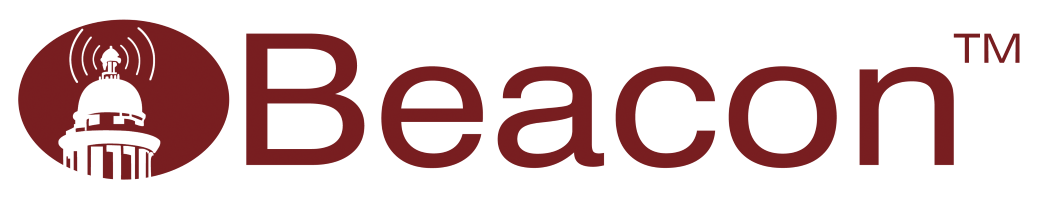
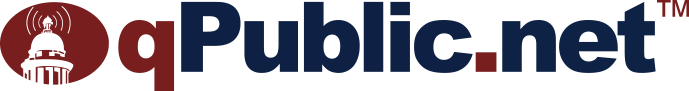

In [206]:
parcel_html

In [201]:
len(proxies)

20

In [8]:
path = PREPROCESSED_DATA_PATH / 'fips' / county_fips_code
!mkdir -p {path}
df.to_csv(path / 'properties.csv')

In [9]:
!wc -l {path}/properties.csv

17245 ../../data/preprocessed/property_assessor/fips/45039/properties.csv


In [10]:
df

,ParcelId,OwnerName,Address,City,State,Zip
0,216-00-00-005-000,CURRENT RESIDENT,2100FT W OF INT S-20-323 & S-20-324,Fairfield,SC,NaN
1,215-00-00-074-000,CURRENT RESIDENT,293 EMERALD DR TRACT,Fairfield,SC,NaN
2,215-00-00-102-000,CURRENT RESIDENT,285 EMERALD DR,Fairfield,SC,NaN
3,026-04-02-005-000,CURRENT RESIDENT,SW OF GIBSON END RD RD,Fairfield,SC,NaN
4,026-04-02-007-000,CURRENT RESIDENT,557 GIBSON END ROAD,Fairfield,SC,NaN
...,...,...,...,...,...,...
17480,141-00-00-031-000,CURRENT RESIDENT,S 2000FT INT S-20-115 & HWY 34 E H,Fairfield,SC,NaN
17481,077-01-00-002-000,CURRENT RESIDENT,1704 GREAT NORTH RD RD,Fairfield,SC,NaN
17482,048-00-00-002-000,CURRENT RESIDENT,"HWY 215 N, CLOWNEY & JOHN BRICE RDS",Fairfield,SC,NaN
17483,047-00-00-047-000,CURRENT RESIDENT,JOHN BRICE RD,Fairfield,SC,NaN
